<a href="https://www.kaggle.com/code/annaelizabeththambi/raisin-nb?scriptVersionId=117941646" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Naive Bayes Classification on Raisin Dataset**

![image.png](https://cdn-prod.medicalnewstoday.com/content/images/articles/325/325127/raisins-on-a-wooden-spoon.jpg)

## **Dataset Description**

DATASET: https://www.muratkoklu.com/datasets/

Article Download (PDF): https://dergipark.org.tr/tr/download/article-file/1227592

In the study done by **CINAR I., KOKLU M. and TASDEMIR S.**, (2020), machine vision system was developed in order to distinguish between two different variety of raisins (**Kecimen and Besni**) grown in Turkey. Firstly, a total of **900 pieces raisin grains** were obtained, from an equal number of both varieties. These images were subjected to various preprocessing steps and 7 morphological feature extraction operations were performed using image processing techniques. In addition, **minimum, mean, maximum and standard deviation** statistical information was calculated for each feature. The distributions of both raisin varieties on the features were examined and these distributions were shown on the graphs. Later, models were created using LR, MLP, and SVM machine learning techniques and performance measurements were performed. The classification achieved 85.22% with LR, 86.33% with MLP and 86.44% with the highest classification accuracy obtained in the study with SVM. Considering the number of data available, it is possible to say that the study was successful.

## **Problem Statement :**

To classify whether the given raisins belongs to which variety namely - **Kecimen** and **Besni**.

## **Importing required libraries and our dataset.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/kaggle/input/raisin-dataset/Raisin_Dataset/Raisin_Dataset.xlsx')
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


## **Exploring the dataset.**

In [3]:
df.shape

(900, 8)

In [4]:
df.size

7200

In [5]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.

In [7]:
df.describe

<bound method NDFrame.describe of       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    

#### **Let's check for any missing values.**

In [8]:
df.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

**There are no missing values,so we can proceed further.**

## **Data Analysis using seaborn**

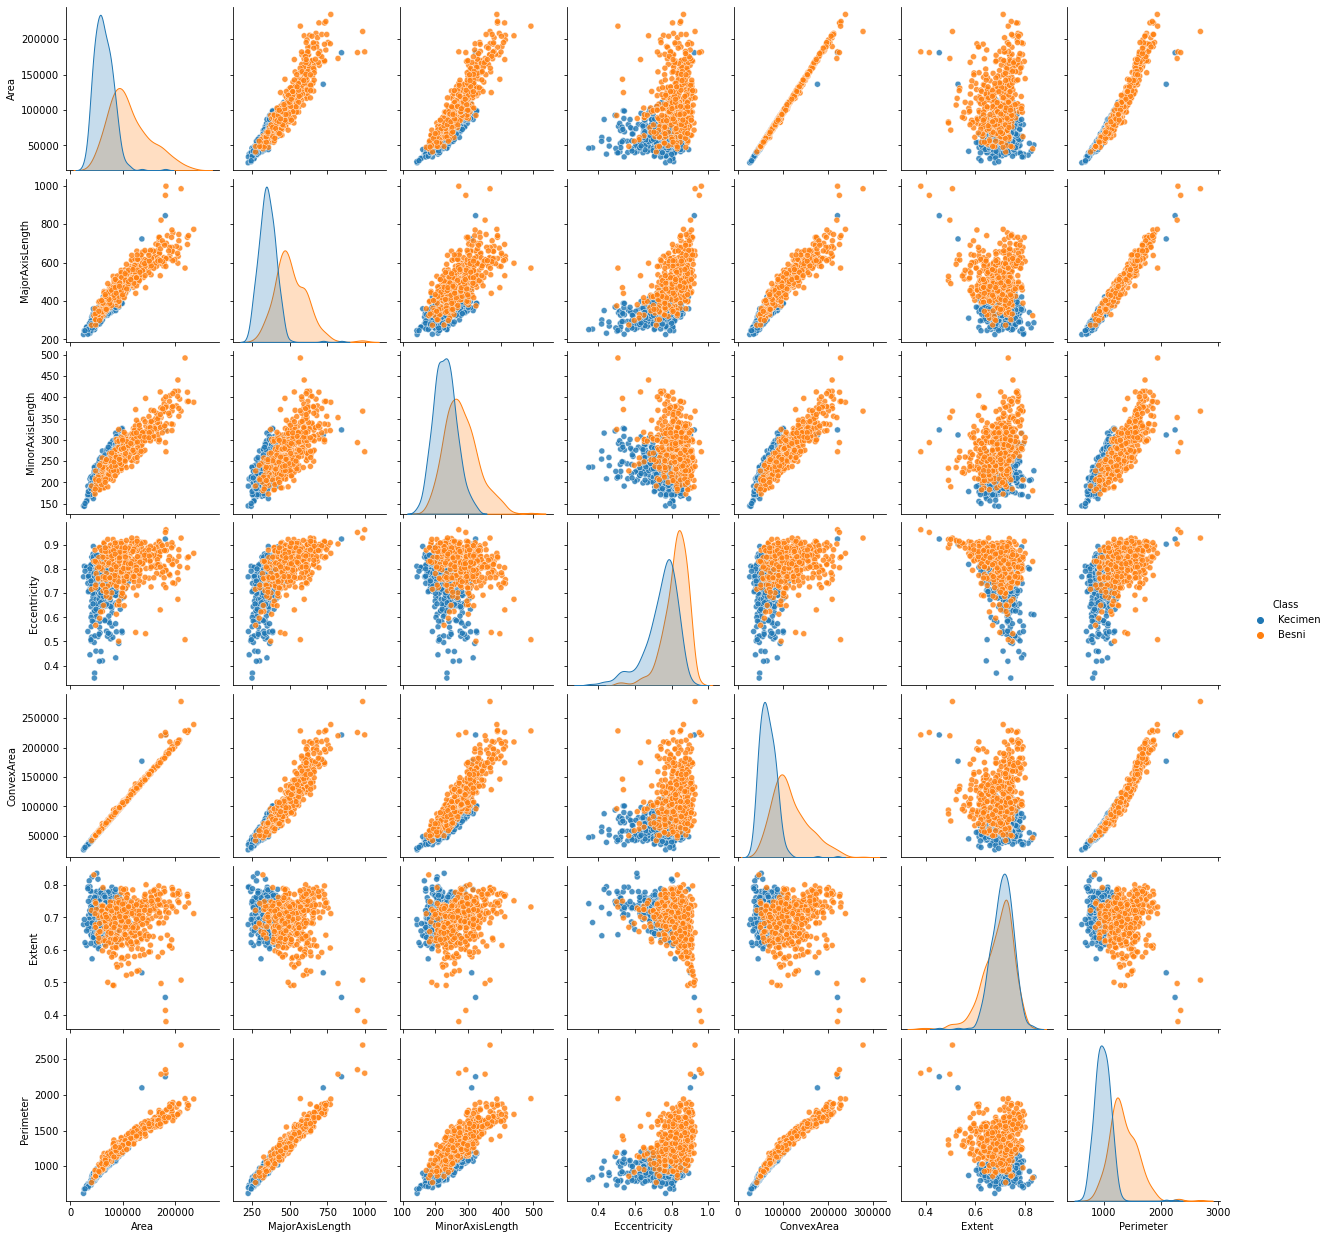

In [9]:
sns.pairplot(df, hue = 'Class', plot_kws={'alpha': 0.8})
plt.show()

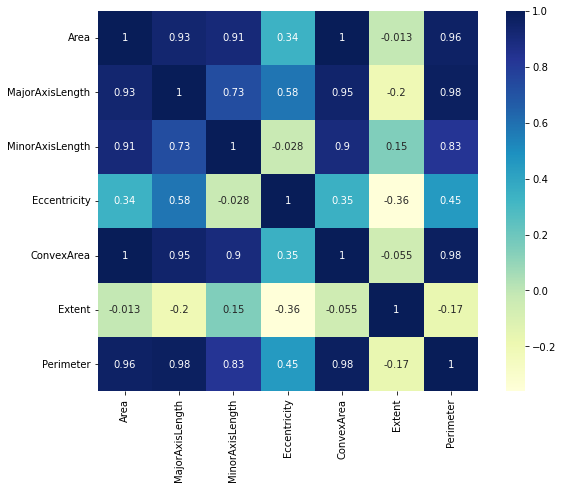

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, square = True)
plt.show()

## **Splitting data into features and target variable.**

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((810, 7), (90, 7), (810,), (90,))

## **Creating a Naive Bayes Model**

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array(['Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Besni', 'Kecimen

In [14]:
y_test

541      Besni
892      Besni
363    Kecimen
122    Kecimen
627      Besni
        ...   
509      Besni
675      Besni
281    Kecimen
615      Besni
156    Kecimen
Name: Class, Length: 90, dtype: object

## **Performance Measure**

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [16]:
print("Classication Report: \n",classification_report(y_test, y_pred))
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",acc*100,"%")

Classication Report: 
               precision    recall  f1-score   support

       Besni       0.86      0.69      0.77        45
     Kecimen       0.74      0.89      0.81        45

    accuracy                           0.79        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.79      0.79        90

Accuracy Score:  78.88888888888889 %


### **🚀About Me**

#### **Hi, I'm Anna!👋**

#### **I am an AI Enthusiast and Data science & ML practitioner.👀💌**